<a href="https://colab.research.google.com/github/Flychuban/sklearn_exercise/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from sklearn import datasets
import pandas as pd

# Load datset
iris_dataset = datasets.load_iris()

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Scale all values for better performance
scaler = MinMaxScaler()
df_scaled_values = scaler.fit_transform(iris_dataset.data)
df_scaled = pd.DataFrame(data = df_scaled_values, columns=iris_dataset.feature_names)

df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


We can find the best number for k using elbow algo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

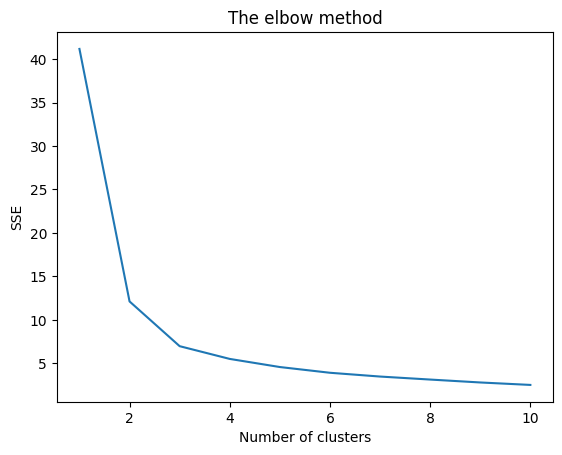

In [25]:
from sklearn.cluster import KMeans

k_range = range(1, 11)
sse = []

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df_scaled)
  sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') #within cluster sum of squares
plt.show()

We can see that best k number is 3

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_scaled)

df_scaled['y_kmeans'] = y_kmeans
df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_kmeans
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


In [44]:
#Visualising the clusters
df0 = df_scaled[df_scaled.y_kmeans == 0]
df1 = df_scaled[df_scaled.y_kmeans == 1]
df2 = df_scaled[df_scaled.y_kmeans == 2]

df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y_kmeans
51,0.583333,0.500000,0.593220,0.583333,2
53,0.333333,0.125000,0.508475,0.500000,2
54,0.611111,0.333333,0.610169,0.583333,2
55,0.388889,0.333333,0.593220,0.500000,2
56,0.555556,0.541667,0.627119,0.625000,2


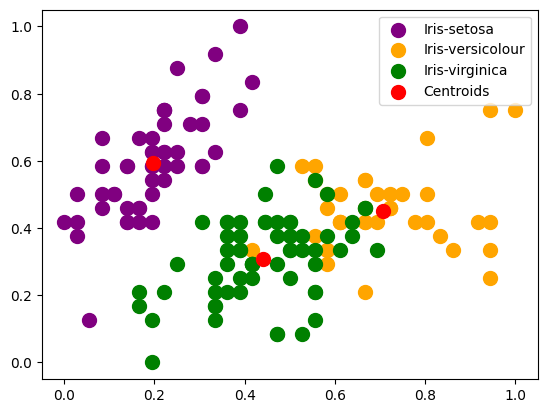

In [48]:
#Visualising the clusters
df0 = df_scaled[df_scaled.y_kmeans == 0]
df1 = df_scaled[df_scaled.y_kmeans == 1]
df2 = df_scaled[df_scaled.y_kmeans == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()